In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
!pip install plotly 
!pip install cufflinks
!pip install textblob

In [5]:
import plotly as py
import cufflinks as cf

In [6]:
from plotly.offline import iplot

In [7]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [8]:
df = pd.read_csv(r"C:\Users\Aishwarya Rokade\Downloads\placement project\news-data.csv")

In [9]:
df.head()

category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...

In [10]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [11]:
''.join(df['text'].tolist())

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [12]:
contractions={
"ain't":"am not",
"aren't":"are not",
"can't":"cannot",
"can't've":"cannot have",
"cause":"because",
"could've":"could have",
"could't":"could not",
"couldn't've":"could not have",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"hadn't":"had not",
"hadn't've":"had not have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he would",
"he'd've":"he would have",
"he'll":"he will",
"he'll've":"he will have",
"he's":"he is",
"how'd":"how did",
"how'd'y":"how do you",
"how'll":"how will",
"how's":"how does",
"i'd":"i would",
"i'd've":"i would have",
"i'll":"i will",
"i'll've":"i will have",
"i'm":"i am",
"i've":"i have",
"isn't":"is not",
"it'd":"it would",
"it'd've":"it would have",
"it'll":"it will",
"it'll've":"it will have",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"might've":"might have",
"mightn't've":"might not have",
"mightn't":"might not",
"must've":"must have",
"mustn't":"must not",
"mustn't've":"must not have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"shan't've":"shall not have",
"she'd":"she would",
"she'd've":"she would have",
"she'll":"she will",
"she'll've":"she will have",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"so've":"so have",
"so's":"so is",
"that'd":"that would",
"that'd've":"that would have",
"there's":"there is",
"they'd":"they would",
"they'd've":"they would have",
"they'll":"they will",
"they'll've":"they will have",
"they're":"they are",
"they've":"they have",
"to've":"to have",
"wasn't":"was not",
"u":"you",
"ur":"your",
"n":"and",
"don't've":"do not have",
"want\need":"want need"}

In [13]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
            return x
        else:
            return x

In [14]:
x = " i don't know what date today and my height is 5'8\""

In [15]:
print(cont_to_exp(x))

 i don't know what date today and my height is 5'8"


In [16]:
%%time
df['text'] = df['text'].apply(lambda x: cont_to_exp(x))

Wall time: 8.94 ms


In [17]:
df.head()

category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...

In [18]:
 print(''.join(df['text'].tolist())[:1000])

tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high-

In [19]:
from textblob import TextBlob

In [20]:
df.head()

category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...

In [21]:
df['polarity'] = df['text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [22]:
df['review_len'] = df['text'].apply(lambda x: len(x))

In [23]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [24]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        
    return word_len/len(words)

In [25]:
df['avg_word_len'] = df['text'].apply(lambda x: get_avg_word_len(x))

In [26]:
df.head()

category                                               text  polarity  \
0           tech  tv future in the hands of viewers with home th...  0.177458   
1       business  worldcom boss  left books alone  former worldc... -0.039881   
2          sport  tigers wary of farrell  gamble  leicester say ...  0.060000   
3          sport  yeading face newcastle in fa cup premiership s... -0.037500   
4  entertainment  ocean s twelve raids box office ocean s twelve...  0.123258   

   review_len  word_count  avg_word_len  
0        4333         737      4.786974  
1        1842         300      5.036667  
2        1342         246      4.361789  
3        2176         341      5.240469  
4        1579         260      4.973077

In [27]:
df['polarity'].iplot(kind = 'hist',colors = 'red',bins = 50,
                    xTitle = 'Polarity', yTitle = ' Count', title = 'Sentiment Polarity Distribution')

In [28]:
df['review_len'].iplot(kind = 'hist', bins = 100, xTitle = 'Review_len', yTitle = 'Counts',
                      title = 'Review Text len Distribution ')

In [29]:
df['word_count'].iplot(kind = 'hist', xTitle = 'word_count', yTitle = 'Counts',
                      title = 'word Count Distribution ')

In [30]:
df['avg_word_len'].iplot(kind = 'hist', bins = 100, xTitle = 'avg_word_len', yTitle = 'Counts',
                      title = 'Review Text avg word len Distribution ')

In [31]:
df.head(10)

category                                               text  polarity  \
0           tech  tv future in the hands of viewers with home th...  0.177458   
1       business  worldcom boss  left books alone  former worldc... -0.039881   
2          sport  tigers wary of farrell  gamble  leicester say ...  0.060000   
3          sport  yeading face newcastle in fa cup premiership s... -0.037500   
4  entertainment  ocean s twelve raids box office ocean s twelve...  0.123258   
5       politics  howard hits back at mongrel jibe michael howar...  0.144722   
6       politics  blair prepares to name poll date tony blair is...  0.001282   
7          sport  henman hopes ended in dubai third seed tim hen...  0.052632   
8          sport  wilkinson fit to face edinburgh england captai...  0.100340   
9  entertainment  last star wars  not for children  the sixth an...  0.085985   

   review_len  word_count  avg_word_len  
0        4333         737      4.786974  
1        1842         300      5.036667  
2        1342         246      4.361789  
3        2176         341      5.240469  
4        1579         260      4.973077  
5        3533         633      4.475513  
6        1486         269      4.472119  
7        1051         191      4.450262  
8         983         157      5.229299  
9        1248         237      4.202532

In [32]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [33]:
df.groupby('category').count()

text  polarity  review_len  word_count  avg_word_len
category                                                           
business        510       510         510         510           510
entertainment   386       386         386         386           386
politics        417       417         417         417           417
sport           511       511         511         511           511
tech            401       401         401         401           401

In [34]:
df['category'].value_counts().iplot(kind = 'bar', xTitle = 'Category', yTitle = 'Counts',
                                     title = "Bar Chart of Categories")

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
x = 'this is test example'

#unigram = this, is, a, test, example
#bigram = this is, is a, test example
#trigram = this is a, is a test, a test example

#UNIGRAM

In [37]:
def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx])for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [38]:
words = get_top_n_words(df['text'], 20)

In [39]:
print(words)

[('the', 52636), ('to', 25113), ('of', 20008), ('and', 18611), ('in', 17725), ('for', 8945), ('is', 8555), ('that', 8257), ('it', 7893), ('on', 7625), ('said', 7255), ('was', 6028), ('he', 5939), ('be', 5805), ('with', 5354), ('as', 4981), ('has', 4957), ('have', 4772), ('at', 4638), ('by', 4515)]


In [40]:
df1 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df1 = df1.set_index('Unigram')
df1.iplot(kind = 'bar', xTitle = 'Unigram', yTitle = 'Counts', title = 'Top 20 Unigram Words')

#BIGRAM

In [41]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2,2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx])for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [42]:
words = get_top_n_words(df['text'], 20)

In [43]:
print(words)

[('of the', 4956), ('in the', 4912), ('to the', 2054), ('for the', 1878), ('on the', 1805), ('to be', 1710), ('at the', 1602), ('and the', 1343), ('he said', 1323), ('will be', 1236), ('said the', 1198), ('it is', 1176), ('that the', 1034), ('with the', 997), ('by the', 961), ('has been', 904), ('it was', 889), ('from the', 836), ('the us', 828), ('the uk', 702)]


In [44]:
df1 = pd.DataFrame(words, columns = ['Bigram', 'Frequency'])
df1 = df1.set_index('Bigram')
df1.iplot(kind = 'bar', xTitle = 'Bigram', yTitle = 'Counts', title = 'Top 20 Bigram Words')

#TRIGRAM

In [45]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3,3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx])for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [46]:
words = get_top_n_words(df['text'], 20)

In [47]:
df1 = pd.DataFrame(words, columns = ['Trigram', 'Frequency'])
df1 = df1.set_index('Trigram')
df1.iplot(kind = 'bar', xTitle = 'Trigram', yTitle = 'Counts', title = 'Top 20 Trigram Words')

In [48]:
!pip install nltk

In [49]:
import nltk

In [50]:
print(str(df['text']))

0       tv future in the hands of viewers with home th...
1       worldcom boss  left books alone  former worldc...
2       tigers wary of farrell  gamble  leicester say ...
3       yeading face newcastle in fa cup premiership s...
4       ocean s twelve raids box office ocean s twelve...
                              ...                        
2220    cars pull down us retail figures us retail sal...
2221    kilroy unveils immigration policy ex-chatshow ...
2222    rem announce new glasgow concert us band rem h...
2223    how political squabbles snowball it s become c...
2224    souness delight at euro progress boss graeme s...
Name: text, Length: 2225, dtype: object


#BIVARIATE ANALYSIS

In [53]:
df.head(10)

category                                               text  polarity  \
0           tech  tv future in the hands of viewers with home th...  0.177458   
1       business  worldcom boss  left books alone  former worldc... -0.039881   
2          sport  tigers wary of farrell  gamble  leicester say ...  0.060000   
3          sport  yeading face newcastle in fa cup premiership s... -0.037500   
4  entertainment  ocean s twelve raids box office ocean s twelve...  0.123258   
5       politics  howard hits back at mongrel jibe michael howar...  0.144722   
6       politics  blair prepares to name poll date tony blair is...  0.001282   
7          sport  henman hopes ended in dubai third seed tim hen...  0.052632   
8          sport  wilkinson fit to face edinburgh england captai...  0.100340   
9  entertainment  last star wars  not for children  the sixth an...  0.085985   

   review_len  word_count  avg_word_len  
0        4333         737      4.786974  
1        1842         300      5.036667  
2        1342         246      4.361789  
3        2176         341      5.240469  
4        1579         260      4.973077  
5        3533         633      4.475513  
6        1486         269      4.472119  
7        1051         191      4.450262  
8         983         157      5.229299  
9        1248         237      4.202532

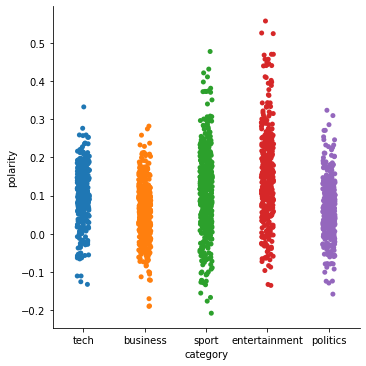

In [54]:
sns.catplot(x = 'category', y = 'polarity', data = df)

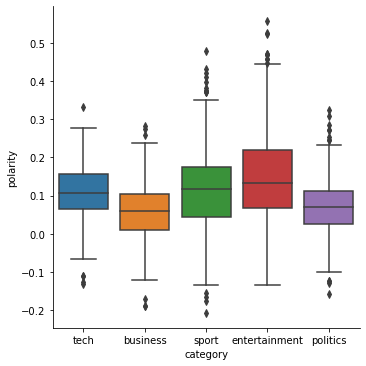

In [55]:
sns.catplot(x = 'category', y = 'polarity', data = df, kind = 'box')

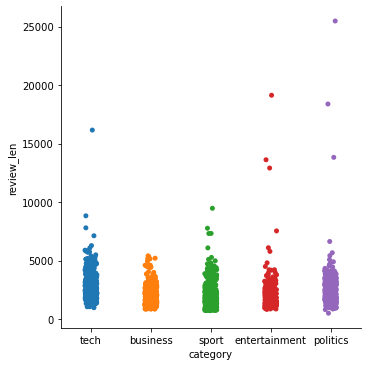

In [56]:
sns.catplot(x = 'category', y = 'review_len', data=df)

#DISTRIBUTION OF RSENTIMENT POLARITY BASED ON RECOMMENDATION

In [57]:
import plotly.express as px
import plotly.graph_objects as go

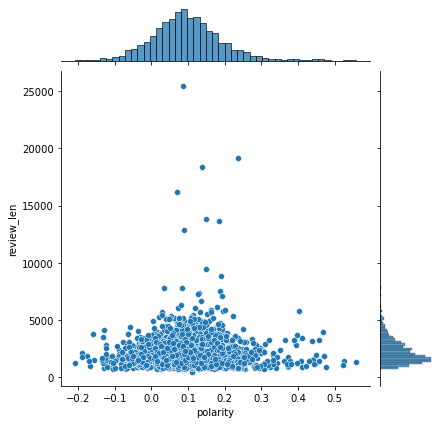

In [58]:
sns.jointplot(x = 'polarity', y = 'review_len', data=df, kind = 'scatter')

In [59]:
df.head()

category                                               text  polarity  \
0           tech  tv future in the hands of viewers with home th...  0.177458   
1       business  worldcom boss  left books alone  former worldc... -0.039881   
2          sport  tigers wary of farrell  gamble  leicester say ...  0.060000   
3          sport  yeading face newcastle in fa cup premiership s... -0.037500   
4  entertainment  ocean s twelve raids box office ocean s twelve...  0.123258   

   review_len  word_count  avg_word_len  
0        4333         737      4.786974  
1        1842         300      5.036667  
2        1342         246      4.361789  
3        2176         341      5.240469  
4        1579         260      4.973077

In [60]:
df = df.drop_duplicates()

In [62]:
df = df.reset_index()

In [63]:
df.drop('index',inplace=True,axis=1)

In [64]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Aishwarya
[nltk_data]     Rokade\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
from nltk.corpus import stopwords

In [66]:
df.sample(5)

category                                               text  \
246        business  steady job growth continues in us the us creat...   
679   entertainment  landmark movies  of 2004 hailed us film profes...   
1690  entertainment  abba reunite for musical premiere the original...   
1380          sport  roddick splits from coach gilbert andy roddick...   
1315       business  india and russia in energy talks india and rus...   

      polarity  review_len  word_count  avg_word_len  
246   0.159102        2194         383      4.642298  
679   0.128216        2118         343      5.075802  
1690  0.139008        1572         266      4.849624  
1380  0.255000        1591         297      4.299663  
1315  0.093519        2772         479      4.732777

In [67]:
corpus = []
for i in range(0, len(df)):
  text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
  text = text.lower()
  text = ' '.join((word) for word in text.split() if word not in stopwords.words('english'))
  corpus.append(text)

In [68]:
type(corpus)

list

In [69]:
!pip install gensim

In [70]:
import gensim

D:\anaconda\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning:

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.



In [71]:
X = [text.split() for text in corpus]

In [72]:
print(X[0])

['tv', 'future', 'hands', 'viewers', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'digital', 'video', 'recorders', 'moving', 'living', 'room', 'way', 'people', 'watch', 'tv', 'radically', 'different', 'five', 'years', 'time', 'according', 'expert', 'panel', 'gathered', 'annual', 'consumer', 'electronics', 'show', 'las', 'vegas', 'discuss', 'new', 'technologies', 'impact', 'one', 'favourite', 'pastimes', 'us', 'leading', 'trend', 'programmes', 'content', 'delivered', 'viewers', 'via', 'home', 'networks', 'cable', 'satellite', 'telecoms', 'companies', 'broadband', 'service', 'providers', 'front', 'rooms', 'portable', 'devices', 'one', 'talked', 'technologies', 'ces', 'digital', 'personal', 'video', 'recorders', 'dvr', 'pvr', 'set', 'top', 'boxes', 'like', 'us', 'tivo', 'uk', 'sky', 'system', 'allow', 'people', 'record', 'store', 'play', 'pause', 'forward', 'wind', 'tv', 'programmes', 'want', 'essentially', 'technology', 'allows', 'much', 'personalised', 'tv', 'als

In [73]:
word_dim = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=word_dim, window=10, min_count=1)

TypeError: __init__() got an unexpected keyword argument 'size'

In [74]:
len(w2v_model.wv.vocab)

NameError: name 'w2v_model' is not defined

In [75]:
w2v_model.wv['tv']

NameError: name 'w2v_model' is not defined

In [76]:
w2v_model.wv.most_similar('tvs')

NameError: name 'w2v_model' is not defined

In [78]:
!pip install keras

In [80]:
!pip install Tensorflow

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\anaconda\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=e9b7103d73957336145fbb51d41536c11ac6ab826d072d375357e9d74430a921
  Stored in directory: c:\users\aishwarya rokade\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


In [81]:
from keras.preprocessing.text import Tokenizer

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [82]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [83]:
from nltk.corpus import stopwords

In [84]:
corpus = []
for i in range(0, len(df)):
  text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
  text = text.lower()
  text = ' '.join((word) for word in text.split() if word not in stopwords.words('english'))
  corpus.append(text)

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=2000)

X_bow = bow.fit_transform(corpus).toarray()

In [86]:
X_bow[4:9]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [87]:
y=df.category

In [88]:
from sklearn.model_selection import train_test_split
X_train_bow,X_test_bow,y_train,y_test = train_test_split(X_bow,y,test_size=0.2,random_state=42)

In [89]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='saga',max_iter=500)

lr.fit(X_train_bow,y_train)
y_pred1 = lr.predict(X_test_bow)

print("******** LogisticRegression ********")
print(f'Accuracy is : {accuracy_score(y_pred1,y_test)}')

******** LogisticRegression ********
Accuracy is : 0.9647887323943662


D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [90]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

mnb.fit(X_train_bow,y_train)
y_pred2 = mnb.predict(X_test_bow)

print("******** MultinomialNB ********")
print(f'Accuracy is : {accuracy_score(y_pred2,y_test)}')

******** MultinomialNB ********
Accuracy is : 0.9788732394366197


In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred3 = rf.predict(X_test_bow)

print("******** RandomForestClassifier ********")
print(f'Accuracy is : {accuracy_score(y_pred3,y_test)}')

******** RandomForestClassifier ********
Accuracy is : 0.960093896713615


In [95]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train_bow,y_train)
y_pred4 = xgb.predict(X_test_bow)

print("******** XGBClassifier ********")
print(f'Accuracy is : {accuracy_score(y_pred4,y_test)}')

D:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[17:13:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
******** XGBClassifier ********
Accuracy is : 0.9530516431924883


In [96]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train_bow,y_train)
y_pred5 = svc.predict(X_test_bow)

print("*******SVC*******")
print(f'Accuracy is: {accuracy_score(y_pred5,y_test)}')

*******SVC*******
Accuracy is: 0.9483568075117371


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2000,ngram_range=(1,2))

X_tfidf = tfidf.fit_transform(corpus).toarray()

In [98]:
X_tfidf[4:9]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02917743, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [99]:
X_tfidf.shape

(2126, 2000)

In [100]:
y = df.category

In [101]:
y

0                tech
1            business
2               sport
3               sport
4       entertainment
            ...      
2121         business
2122         politics
2123    entertainment
2124         politics
2125            sport
Name: category, Length: 2126, dtype: object

In [102]:
from sklearn.model_selection import train_test_split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf,y,test_size = 0.2, random_state = 42)

In [103]:
X_train_tfidf.shape , X_test_tfidf.shape

((1700, 2000), (426, 2000))

In [104]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()

lr.fit(X_train_tfidf,y_train)
y_pred1 = lr.predict(X_test_tfidf)

print("******** LogisticRegression after tfidf********")
print(f'Accuracy is : {accuracy_score(y_pred1,y_test)}')

******** LogisticRegression after tfidf********
Accuracy is : 0.9647887323943662


In [105]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

mnb.fit(X_train_tfidf,y_train)
y_pred2 = mnb.predict(X_test_tfidf)

print("******** MultinomialNB after tfidf********")
print(f'Accuracy is : {accuracy_score(y_pred2,y_test)}')

******** MultinomialNB after tfidf********
Accuracy is : 0.9788732394366197


In [106]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred3 = rf.predict(X_test_tfidf)

print("******** RandomForestClassifier after tfidf ********")
print(f'Accuracy is : {accuracy_score(y_pred3,y_test)}')

******** RandomForestClassifier after tfidf ********
Accuracy is : 0.9507042253521126


In [107]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train_tfidf,y_train)
y_pred4 = xgb.predict(X_test_tfidf)

print("******** XGBClassifier after tfidf********")
print(f'Accuracy is : {accuracy_score(y_pred4,y_test)}')

D:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[17:17:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
******** XGBClassifier after tfidf********
Accuracy is : 0.9507042253521126


In [108]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train_tfidf,y_train)
y_pred5 = svc.predict(X_test_tfidf)

print("*******SVC after tfidf*******")
print(f'Accuracy is: {accuracy_score(y_pred5,y_test)}')

*******SVC after tfidf*******
Accuracy is: 0.9647887323943662
